# **JOB AND SALARY PREDICTION APPLICATION**

## I. Preprocessing

### 1.1 Import Library

In [ ]:
# pip install pycaret[full]

In [ ]:
# !pip uninstall imgaug && pip uninstall albumentations && pip install git+https://github.com/aleju/imgaug.git

In [ ]:
# from pycaret.utils import version
# version()

In [1]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import operator
import re
#graph
import matplotlib.pyplot as plt
import wordcloud as w
import seaborn as sns

#preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import nltk
nltk.download('punkt')

#algorithms for modeling
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer

#metrics for evaluation
from sklearn.metrics import confusion_matrix, make_scorer, classification_report, accuracy_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Upload database

from google.colab import files
# uploaded = files.upload()

In [19]:
#Read the database file
# import io
# df=pd.read_csv(io.BytesIO(uploaded
# ['Job_Data_01.csv']))
# df.head(5)

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Khoa luan/1. Project Job_Recommendation/Job_Data_01.csv')
df

,Id,JobTitle,Company,Location,Salary,TypeofJob,Description,Require,MoreInfo
0,0,IT PROJECT MANAGER,Yes4All Trading Services Company Limited,"Quận Phú Nhuận, Hồ Chí Minh",Thương lượng,Thương mại điện tử/ Bán lẻ,Yes4All is one of the leading brands for home ...,"Project Manager, Business Analyst",https://topdev.vn/viec-lam/it-project-manager-...
1,1,"HOT KMS Danang | One-day Hiring (Fresher Java,...",KMS Technology,"Quận Hải Châu, Đà Nẵng",Thương lượng,"Dịch vụ IT, Gia công phần mềm, Phần Mềm, Product",KMS ONE-DAY HIRING: a special IT Fresher recru...,"Java, .NET, Tester, QA, QC",https://topdev.vn/viec-lam/kms-danang-one-day-...
2,2,HOT Automation Engineer (Selenium C#),ORIENT SOFTWARE DEVELOPMENT CORPORATION,"Quận Tân Bình, Hồ Chí Minh",Thương lượng,Gia công phần mềm,NaN,"C#, QA, QC, Automation Tester, Selenium",https://topdev.vn/viec-lam/automation-engineer...
3,3,HOT UI Designer for PayPense,HRS GROUP,"Quận 12, Hồ Chí Minh","1,500 - 3,000 USD",Phần Mềm,NaN,UI Design,https://topdev.vn/viec-lam/ui-designer-for-pay...
4,4,HOT Senior Java Back-end Developer - Paypense ...,HRS GROUP,"Quận 12, Hồ Chí Minh","2,000 - 3,000 USD",Phần Mềm,"POSITION Within HRS, the Payment Solutions tea...","Java, Back-End",https://topdev.vn/viec-lam/senior-java-back-en...
...,...,...,...,...,...,...,...,...,...
11745,11745,02 Executive (Software Developer - Agile Team)...,MSIG Insurance (Vietnam) Company Limited,"Quận Hoàn Kiếm, Hà Nội",Thương lượng,Bảo Hiểm,NaN,"NodeJS, JavaScript, C#, .NET",https://topdev.vn/viec-lam/02-executive-softwa...
11746,11746,Middle Java Developer,SOFTWORLD VIETNAM LTD.,"Quận Tân Bình, Hồ Chí Minh","Từ 15,000,000 VND","Phần Mềm, Creative Production, E-commerce Plat...",Tiếp tục mở rộng vào năm 2022 chúng tôi tiếp t...,"Java, Back-End, Spring Boot, JQuery, JUnit, Ja...",https://topdev.vn/viec-lam/middle-java-develop...
11747,11747,Manual Tester (QA/QC) - Up to $1300,STI Holdings,"Quận 3, Hồ Chí Minh","16,000,000 - 30,000,000 VND",Software,NaN,"QA, QC, Mobile Tester, Web Tester, Test Engine...",https://topdev.vn/viec-lam/manual-tester-qa-qc...
11748,11748,"Test Team Leader or Team Leader | Up to $2,500",DataStreams Asia,"Quận Nam Từ Liêm, Hà Nội","Lên tới 2,500 USD",Phần Mềm,We propose to work with the most promising fut...,"Tester, Manual Test, Videos Editor",https://topdev.vn/viec-lam/test-team-leader-or...


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11750 entries, 0 to 11749
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           11750 non-null  int64 
 1   JobTitle     11750 non-null  object
 2   Company      11750 non-null  object
 3   Location     11750 non-null  object
 4   Salary       11659 non-null  object
 5   TypeofJob    11750 non-null  object
 6   Description  5968 non-null   object
 7   Require      11750 non-null  object
 8   MoreInfo     11750 non-null  object
dtypes: int64(1), object(8)
memory usage: 826.3+ KB


### 1.2 Remove Duplicate and Null Data

In [21]:
#Delete column ID
df=df.drop(df.columns[0], axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11750 entries, 0 to 11749
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   JobTitle     11750 non-null  object
 1   Company      11750 non-null  object
 2   Location     11750 non-null  object
 3   Salary       11659 non-null  object
 4   TypeofJob    11750 non-null  object
 5   Description  5968 non-null   object
 6   Require      11750 non-null  object
 7   MoreInfo     11750 non-null  object
dtypes: object(8)
memory usage: 734.5+ KB


In [8]:
#Delete column Desc

df=df.drop(df.columns[5], axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11750 entries, 0 to 11749
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   11750 non-null  object
 1   Company    11750 non-null  object
 2   Location   11750 non-null  object
 3   Salary     11659 non-null  object
 4   TypeofJob  11750 non-null  object
 5   Require    11750 non-null  object
 6   MoreInfo   11750 non-null  object
dtypes: object(7)
memory usage: 642.7+ KB


In [9]:
#Rename Column Require to Skills
df.rename(columns={'Require':'Skills'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11750 entries, 0 to 11749
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   11750 non-null  object
 1   Company    11750 non-null  object
 2   Location   11750 non-null  object
 3   Salary     11659 non-null  object
 4   TypeofJob  11750 non-null  object
 5   Skills     11750 non-null  object
 6   MoreInfo   11750 non-null  object
dtypes: object(7)
memory usage: 642.7+ KB


In [10]:
#Check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11750 entries, 0 to 11749
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   11750 non-null  object
 1   Company    11750 non-null  object
 2   Location   11750 non-null  object
 3   Salary     11659 non-null  object
 4   TypeofJob  11750 non-null  object
 5   Skills     11750 non-null  object
 6   MoreInfo   11750 non-null  object
dtypes: object(7)
memory usage: 642.7+ KB


In [11]:
# Delete Duplicate
df_dupli= df.drop_duplicates(keep='first')
df_dupli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 0 to 11749
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   477 non-null    object
 1   Company    477 non-null    object
 2   Location   477 non-null    object
 3   Salary     473 non-null    object
 4   TypeofJob  477 non-null    object
 5   Skills     477 non-null    object
 6   MoreInfo   477 non-null    object
dtypes: object(7)
memory usage: 29.8+ KB


In [12]:
#Check null
print(df_dupli.isnull().values.any())

True


In [13]:
#Count the null values
df_dupli.isna().sum()


JobTitle     0
Company      0
Location     0
Salary       4
TypeofJob    0
Skills       0
MoreInfo     0
dtype: int64

In [14]:
#Drop Null
df_dupli.dropna(inplace = True)
df_dupli.isna().sum()
df_job = df_dupli

In [15]:
df_job.isna().sum()

JobTitle     0
Company      0
Location     0
Salary       0
TypeofJob    0
Skills       0
MoreInfo     0
dtype: int64

In [16]:
df_job.head(5)

,JobTitle,Company,Location,Salary,TypeofJob,Skills,MoreInfo
0,IT PROJECT MANAGER,Yes4All Trading Services Company Limited,"Quận Phú Nhuận, Hồ Chí Minh",Thương lượng,Thương mại điện tử/ Bán lẻ,"Project Manager, Business Analyst",https://topdev.vn/viec-lam/it-project-manager-...
1,"HOT KMS Danang | One-day Hiring (Fresher Java,...",KMS Technology,"Quận Hải Châu, Đà Nẵng",Thương lượng,"Dịch vụ IT, Gia công phần mềm, Phần Mềm, Product","Java, .NET, Tester, QA, QC",https://topdev.vn/viec-lam/kms-danang-one-day-...
2,HOT Automation Engineer (Selenium C#),ORIENT SOFTWARE DEVELOPMENT CORPORATION,"Quận Tân Bình, Hồ Chí Minh",Thương lượng,Gia công phần mềm,"C#, QA, QC, Automation Tester, Selenium",https://topdev.vn/viec-lam/automation-engineer...
3,HOT UI Designer for PayPense,HRS GROUP,"Quận 12, Hồ Chí Minh","1,500 - 3,000 USD",Phần Mềm,UI Design,https://topdev.vn/viec-lam/ui-designer-for-pay...
4,HOT Senior Java Back-end Developer - Paypense ...,HRS GROUP,"Quận 12, Hồ Chí Minh","2,000 - 3,000 USD",Phần Mềm,"Java, Back-End",https://topdev.vn/viec-lam/senior-java-back-en...


### 1.3 Top 5 Company

In [ ]:
#Get 5 Company
y_company = df_job['Company'].value_counts()[:5].tolist()
x_company = df_job['Company'].value_counts()[:5].index.tolist()
print(y_company)
print("Top 5 companies :" +str(x_company))

[15, 10, 10, 9, 7]
Top 5 companies :['Ngân hàng Quốc Tế VIB', 'NTT DATA Vietnam', 'ZOI.TECH SGN', 'Ngân hàng TMCP Hàng Hải Việt Nam (MSB)', 'Citynow Technology Solutions']


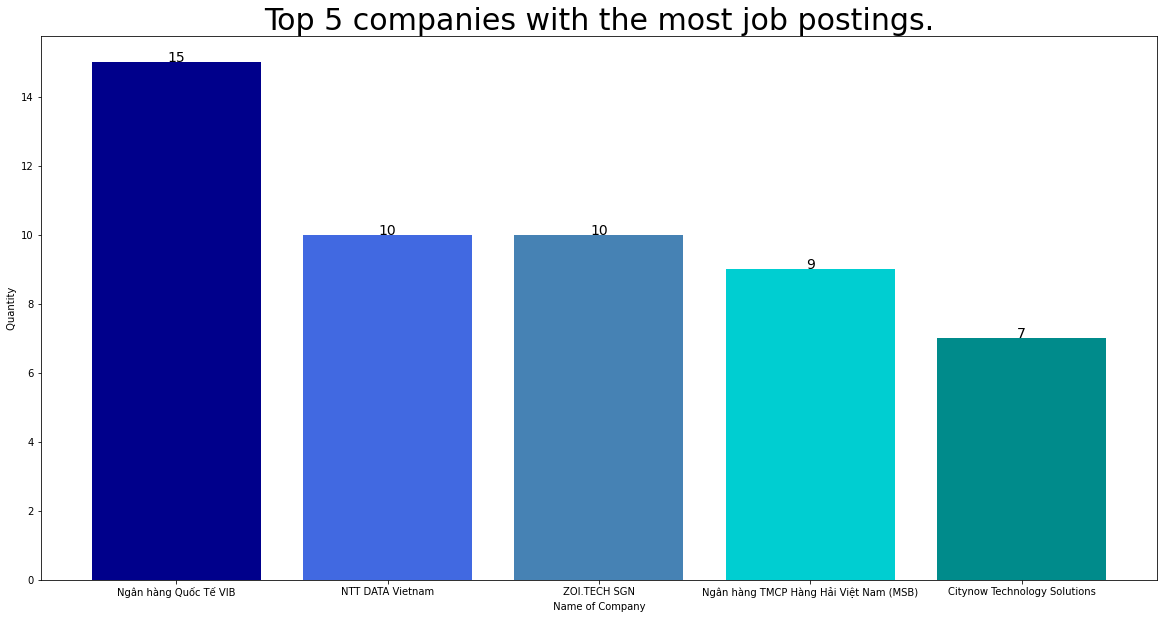

In [ ]:
#Draw column diagram
def addlabels(x,y):
  for i in range(len(x)):
      plt.text(i,y[i],y[i], ha ="center", size = 14)

##initializing the label
nameofCompany = x_company
numberofCompany = y_company

##setting figure size by using figure() function
plt.figure(figsize =(20,10))

#making the bar char on the data
plt.bar(nameofCompany,numberofCompany, color =['darkblue', 'royalblue', 'steelblue','darkturquoise','darkcyan'] )

# calling the function to add the values labels

addlabels(nameofCompany,numberofCompany )

#giving the title for the plot
plt.title("Top 5 companies with the most job postings.", size = 30)

#giving the X and Y labels
plt.xlabel(" Name of Company ")
plt.ylabel(" Quantity ")

plt.show()

### 1.4 Top 5 Location

In [ ]:
#Get 5 Location
y_Location= df_job['Location'].value_counts()[:5].tolist()
x_Location = df_job['Location'].value_counts()[:5].index.tolist()
print(y_Location)
print("Top 5 locations :" +str(x_Location))

[66, 44, 43, 33, 23]
Top 5 locations :['Quận 1, Hồ Chí Minh', 'Quận 3, Hồ Chí Minh', 'Quận Cầu Giấy, Hà Nội', 'Quận Tân Bình, Hồ Chí Minh', 'Quận Đống Đa, Hà Nội']


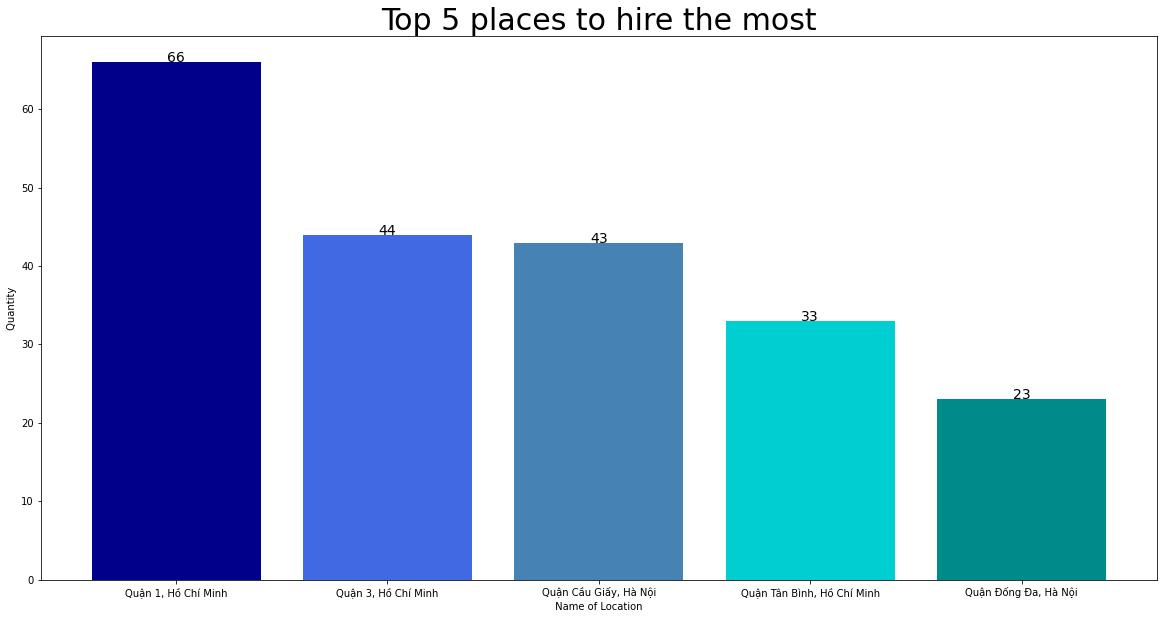

In [ ]:
#Draw column diagram
def addlabels2(x,y):
  for i in range(len(x)):
      plt.text(i,y[i],y[i], ha ="center", size = 14)

##initializing the label
nameofLocation = x_Location
numberofLocation = y_Location

##setting figure size by using figure() function
plt.figure(figsize =(20,10))

#making the bar char on the data
plt.bar(nameofLocation,numberofLocation, color =['darkblue', 'royalblue', 'steelblue','darkturquoise','darkcyan'] )

# calling the function to add the values labels

addlabels2(nameofLocation,numberofLocation )

#giving the title for the plot
plt.title("Top 5 places to hire the most", size = 30)

#giving the X and Y labels
plt.xlabel(" Name of Location ")
plt.ylabel(" Quantity ")

plt.show()

### 1.5 Top 5 Type of Job

In [ ]:
#Get 5 Location
y_Location= df_job['TypeofJob'].value_counts()[:5].tolist()
x_Location = df_job['TypeofJob'].value_counts()[:5].index.tolist()
print(y_Location)
print("Top 5 types of job :" +str(x_Location))

[171, 30, 27, 16, 16]
Top 5 types of job :['Phần Mềm', 'Ngân Hàng', 'Thương mại điện tử/ Bán lẻ', 'Fintech', 'Giải trí/ Game']


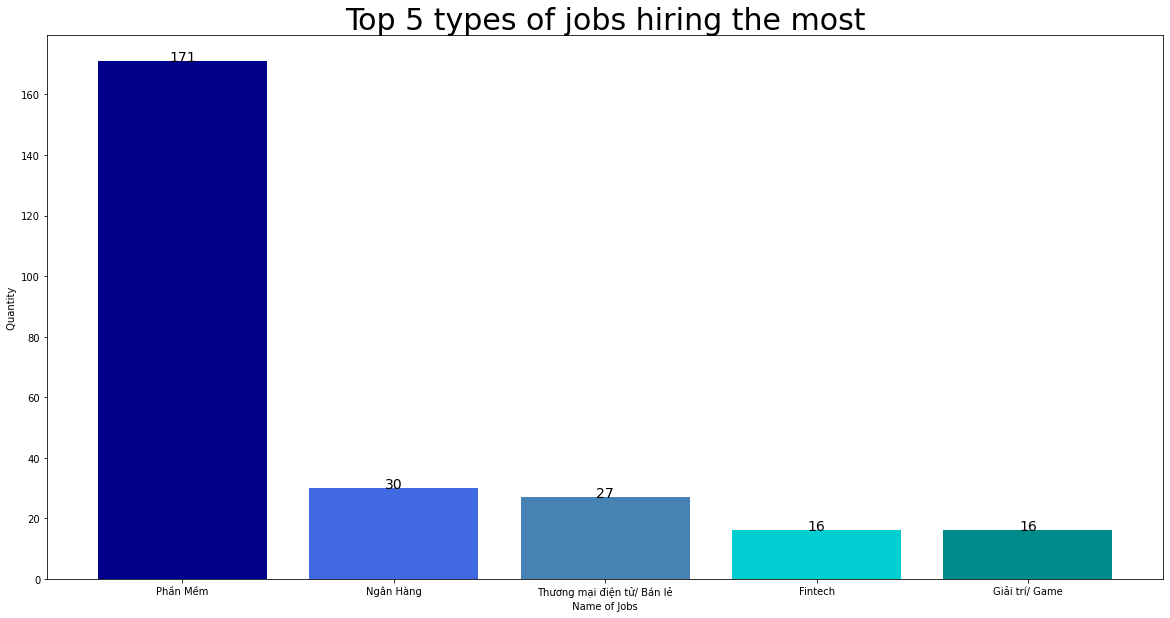

In [ ]:
#Draw column diagram
def addlabels2(x,y):
  for i in range(len(x)):
      plt.text(i,y[i],y[i], ha ="center", size = 14)

##initializing the label
nameofLocation = x_Location
numberofLocation = y_Location

##setting figure size by using figure() function
plt.figure(figsize =(20,10))

#making the bar char on the data
plt.bar(nameofLocation,numberofLocation, color =['darkblue', 'royalblue', 'steelblue','darkturquoise','darkcyan'])

# calling the function to add the values labels

addlabels2(nameofLocation,numberofLocation )

#giving the title for the plot
plt.title("Top 5 types of jobs hiring the most", size = 30)

#giving the X and Y labels
plt.xlabel(" Name of Jobs ")
plt.ylabel(" Quantity ")

plt.show()

### 1.6 Top skills

In [ ]:
#Upload stopword for English
# uploaded = files.upload()

In [ ]:
skillsTokenized =[]
stopwordSkills =[]

#Get the stopword and store in list
with open("/content/drive/MyDrive/Colab Notebooks/english.txt", 'r', encoding="utf-8") as f:
  for word in f:
      word.lower()
      word = word.split('\n')
      stopwordSkills.append(word[0])


for k in df['Skills'].values:
    k = str(k).split(',')
    require_without_sw = [f for f in k if not f.lower() in stopwordSkills]
    for j in require_without_sw:
      skillsTokenized.append(j)
df_skill = pd.DataFrame({'Skills':skillsTokenized })

In [ ]:
#Get maximum upto 150 Skills
y_Skill= df_skill['Skills'].value_counts()[:150].tolist()
x_Skill = df_skill['Skills'].value_counts()[:150].index.tolist()

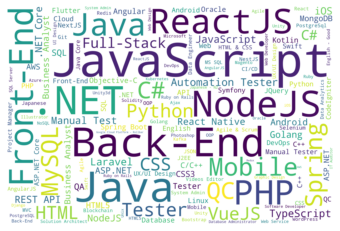

<Figure size 432000x432000 with 0 Axes>

In [ ]:
#Draw column diagram
from pandas.core.common import random_state
from pandas.tseries import frequencies
import wordcloud as w
import numpy as np
import matplotlib.pyplot as plt

lskill = x_Skill
frequencies = y_Skill

#generate_from_frequencies
d = dict(zip(lskill, frequencies))
wordcloud = w.WordCloud(collocations=False, random_state =1 ,
                        max_words=1000,normalize_plurals=False,
                        background_color='white', width=3000,
                        height =2000).generate_from_frequencies(d)
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis("off")
plt.figure(figsize=(6000,6000))
plt.show()

In [ ]:
df_skill['Skills'].value_counts()

 JavaScript       1973
Java              1566
 Back-End         1432
 .NET             1360
 NodeJS           1135
                  ... 
 PySpark             1
 IT System           1
 JUnit               1
 Java 8              1
 Test Engineer       1
Name: Skills, Length: 341, dtype: int64

### 1.7 Clean Job Title

In [23]:
#Create column Clean Job Title to serve Data mining and data query
# 1. Import Stop word for VN
# uploaded = files.upload()

In [18]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import digits
from nltk.tokenize import  word_tokenize
import nltk

stopwordsList =[]
job =[]
cleanJob =[]
## Split the stop word
with open("/content/drive/MyDrive/Colab Notebooks/Khoa luan/1. Project Job_Recommendation/vietnamese.txt", 'r', encoding="utf-8") as f:
  for word in f:
      word = word.split('\n')
      stopwordsList.append(word[0])

#Remove number
remove_digits = str.maketrans('', '', digits)

#Remove some character not suitable
for i in df_job['JobTitle'].values:
  jobs = i.lower()
  jobs = jobs.replace("hot","")
  jobs = jobs.replace("be","Back End")
  jobs = jobs.replace("qa","Quality Assurance")
  jobs = jobs.replace("[",'')
  jobs = jobs.replace(",",'')
  jobs = jobs.replace("|",'')
  jobs = jobs.replace("]",'')
  jobs = jobs.replace("đà nẵng",'')
  jobs = jobs.replace("$",'')
  jobs = jobs.replace("up to",'')
  jobs = jobs.replace("hà nội",'')
  jobs = jobs.replace("junior",'')
  jobs = jobs.replace("senior",'')
  jobs = jobs.replace("fresher",'')
  jobs = jobs.replace("line",'')
  jobs = jobs.replace("endrnate",'')
  jobs = jobs.replace("hiback",'')
  jobs = jobs.replace("pmp",'')
  jobs = jobs.replace("mil",'')
  jobs = jobs.replace("middle",'')
  jobs = jobs.replace("salary",'')
  jobs = jobs.replace("experienced",'')
  jobs = jobs.replace("experience",'')
  jobs = jobs.replace("leader",'')
  jobs = jobs.replace("expressjs",'')
  jobs = jobs.replace("expert",'')
  jobs = jobs.replace("executive",'')
  jobs = jobs.replace("fulltime",'')
  jobs = jobs.replace("core",'')
  jobs = jobs.replace("levels",'')
  jobs = jobs.replace("dự",'')
  jobs = jobs.replace("phòng",'')
  jobs = jobs.replace("ưu",'')

  jobs = jobs.translate(remove_digits)
  job.append(jobs)

#Remove character from StopWordList
for j in job:
  text_tokens = word_tokenize(j)
  tokens_without_sw = [f for f in text_tokens if not f in stopwordsList]
  cleanJob.append(' '.join(tokens_without_sw))

#Add the new Column into dataset
df_job['clean_jobtitle']= cleanJob
df_job

,JobTitle,Company,Location,Salary,TypeofJob,Skills,MoreInfo,clean_jobtitle
0,IT PROJECT MANAGER,Yes4All Trading Services Company Limited,"Quận Phú Nhuận, Hồ Chí Minh",Thương lượng,Thương mại điện tử/ Bán lẻ,"Project Manager, Business Analyst",https://topdev.vn/viec-lam/it-project-manager-...,project manager
1,"HOT KMS Danang | One-day Hiring (Fresher Java,...",KMS Technology,"Quận Hải Châu, Đà Nẵng",Thương lượng,"Dịch vụ IT, Gia công phần mềm, Phần Mềm, Product","Java, .NET, Tester, QA, QC",https://topdev.vn/viec-lam/kms-danang-one-day-...,kms danang one-day hiring ( java .net tester l...
2,HOT Automation Engineer (Selenium C#),ORIENT SOFTWARE DEVELOPMENT CORPORATION,"Quận Tân Bình, Hồ Chí Minh",Thương lượng,Gia công phần mềm,"C#, QA, QC, Automation Tester, Selenium",https://topdev.vn/viec-lam/automation-engineer...,automation ( selenium c # )
3,HOT UI Designer for PayPense,HRS GROUP,"Quận 12, Hồ Chí Minh","1,500 - 3,000 USD",Phần Mềm,UI Design,https://topdev.vn/viec-lam/ui-designer-for-pay...,ui designer paypense
4,HOT Senior Java Back-end Developer - Paypense ...,HRS GROUP,"Quận 12, Hồ Chí Minh","2,000 - 3,000 USD",Phần Mềm,"Java, Back-End",https://topdev.vn/viec-lam/senior-java-back-en...,java back-end - paypense ( m/f/d )
...,...,...,...,...,...,...,...,...
11745,02 Executive (Software Developer - Agile Team)...,MSIG Insurance (Vietnam) Company Limited,"Quận Hoàn Kiếm, Hà Nội",Thương lượng,Bảo Hiểm,"NodeJS, JavaScript, C#, .NET",https://topdev.vn/viec-lam/02-executive-softwa...,( software - agile team ) / division
11746,Middle Java Developer,SOFTWORLD VIETNAM LTD.,"Quận Tân Bình, Hồ Chí Minh","Từ 15,000,000 VND","Phần Mềm, Creative Production, E-commerce Plat...","Java, Back-End, Spring Boot, JQuery, JUnit, Ja...",https://topdev.vn/viec-lam/middle-java-develop...,java
11747,Manual Tester (QA/QC) - Up to $1300,STI Holdings,"Quận 3, Hồ Chí Minh","16,000,000 - 30,000,000 VND",Software,"QA, QC, Mobile Tester, Web Tester, Test Engine...",https://topdev.vn/viec-lam/manual-tester-qa-qc...,manual tester ( Quality Assurance/qc ) -
11748,"Test Team Leader or Team Leader | Up to $2,500",DataStreams Asia,"Quận Nam Từ Liêm, Hà Nội","Lên tới 2,500 USD",Phần Mềm,"Tester, Manual Test, Videos Editor",https://topdev.vn/viec-lam/test-team-leader-or...,test team or team


## II. DATA MINING

### 2.1. TF - IDF

In [62]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_job['clean_jobtitle'].values)
analyze = vectorizer.build_analyzer()
features = vectorizer.get_feature_names_out()
print (X)

  (0, 169)	0.667768596889035
  (0, 227)	0.7443689280248401
  (1, 60)	0.3614984269650746
  (1, 164)	0.3614984269650746
  (1, 275)	0.20653906668694214
  (1, 184)	0.17140627005250453
  (1, 148)	0.17048245108301285
  (1, 128)	0.3614984269650746
  (1, 75)	0.3614984269650746
  (1, 202)	0.3614984269650746
  (1, 72)	0.33883707324046286
  (1, 154)	0.3614984269650746
  (2, 249)	0.7863349624359195
  (2, 30)	0.6178003940197038
  (3, 211)	0.6933101776280042
  (3, 77)	0.5171469638314188
  (3, 296)	0.5018764941670119
  (4, 96)	0.34995143118338146
  (4, 35)	0.42427005036952375
  (4, 211)	0.7460700769633077
  (4, 148)	0.37537762377652334
  (5, 180)	0.47348578150993287
  (5, 193)	0.33133983118984545
  (5, 149)	0.3664230642227922
  (5, 226)	0.5410348353445992
  :	:
  (464, 96)	0.32008427262959477
  (465, 96)	0.5246520188696135
  (465, 35)	0.6360715191807275
  (465, 184)	0.565820891787463
  (466, 245)	0.8040149542022609
  (466, 73)	0.5946090761324926
  (467, 87)	0.7583437314025961
  (467, 267)	0.651854880

### 2.2 Clustering Using KMeans

2.2.1 Getting the Optimize cluster using elbow method

In [63]:
#Using the elbow method to find the optimal number of the cluster
#Within Cluster Sum of Squares (WCSS)
wcss =[]
for i in range (1,10):
  kmeans = KMeans(n_clusters= i, init ='k-means++', random_state = 42, max_iter = 600, n_init =1)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

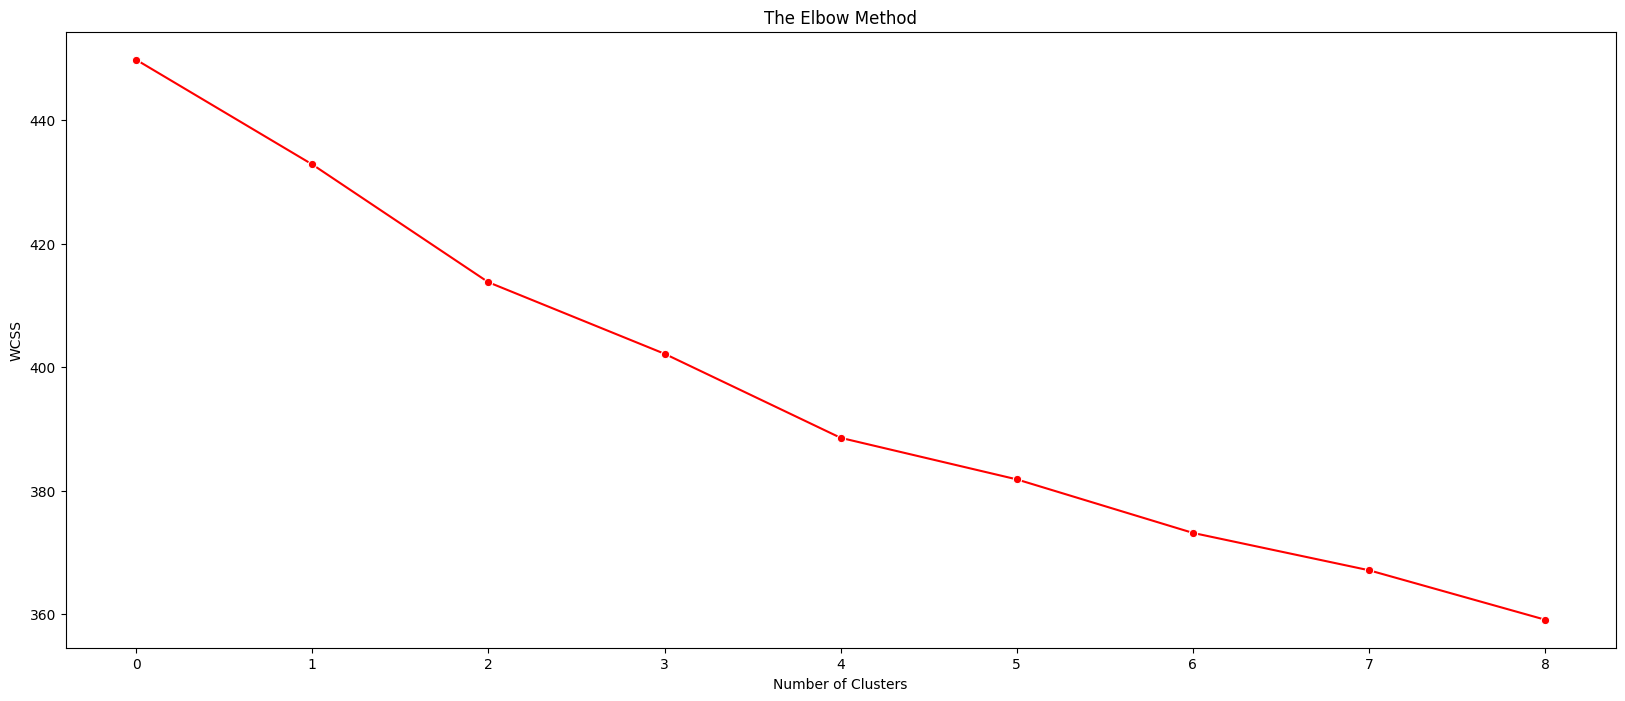

In [65]:
#Plot the graph
plt.figure(figsize=(20,8))
sns.lineplot(wcss, marker='o', color ='red')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [66]:
#Choose the best Cluster
true_k=4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=600, n_init=1, random_state=42)
pred = model.fit_predict(X)
order_centroids =model.cluster_centers_.argsort()[:, ::-1]
term = vectorizer.get_feature_names_out()

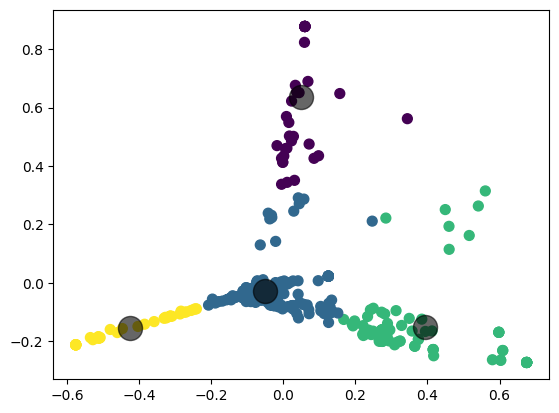

In [67]:
#Figure
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sklearn_pca= PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X.toarray())
kmeans= KMeans(n_clusters = 4 , init='k-means++', max_iter=600, n_init=1, random_state=42)
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:,0], Y_sklearn[:,1], c=prediction, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:, 1], c='black',s=300, alpha = 0.6);

In [68]:
#Silhouette score value ranges from -1 to 1
#metric used to calculate the goodness of a clustering technique
# 1: Means clusters are well aprart from each other and clearly distinguished
from sklearn.metrics import silhouette_score
print('Kmeans Scaled Silhouette Score: {}'.format(silhouette_score(X, model.labels_, metric = 'euclidean')))

Kmeans Scaled Silhouette Score: 0.06114529559008186


In [70]:
#Show the cluster members
import numpy as np
def get_top_keyword(data, clusters, labels, n_terms):
  df=pd.DataFrame(data.todense()).groupby(clusters).mean()

  for i,r in df.iterrows():
    print('\nCluster {}'.format(i))
    print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

#Get the top 10 frequency word for each cluster
get_top_keyword(X, pred, features, 20)


Cluster 0
flutter,server,golang,mysql,english,python,all,backend,reactjs,angular,end,back,mvc,full,web,stack,java,sql,asp,net

Cluster 1
all,react,python,native,asp,mobile,remote,golang,angular,php,net,java,javascript,full,stack,backend,reactjs,end,back,nodejs

Cluster 2
devops,react,ios,unity,ui,designer,android,manager,web,data,mobile,business,analyst,software,assurance,qc,quality,tester,php,java

Cluster 3
viez,aic,native,typescript,angular,js,spring,remote,laravel,react,php,css,java,html,javascript,reactjs,vuejs,back,front,end


2.2.2 Classification

In [73]:
##Do further classfication, Give the 0,1,2,3,4,5,6 a name to understand better
#Give the Cluster Name
label = []
for i in df_job['clean_jobtitle'].values:

    vec = vectorizer.transform([i])
    pred = model.predict(vec)
    if pred == 0:
      label.append("FullStack")
    elif pred == 1:
      label.append("BackEnd")
    elif pred == 2:
      label.append("Android")
    else:
      label.append("FrontEnd")

df_job['Label'] = label
df_job.head(5)
df_job.to_csv('/content/drive/MyDrive/Colab Notebooks/Khoa luan/1. Project Job_Recommendation/clean_data.csv', index=False)

In [ ]:
jobSkills =[]

for i in df_job["Skills"]:
  jobSkills.append(i.lower())
Xclass = vectorizer.fit_transform(jobSkills)

#Slit data into test and train. Train: 67%, Test: 33%

X_train, X_test, Y_train, Y_test = train_test_split(Xclass, label, test_size=0.33, random_state =42)

### 2.3 Logistic Regression

Text(0, 0.5, 'Accuracy')

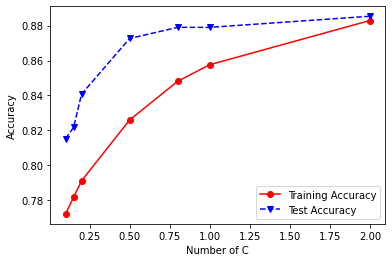

In [ ]:
#Obtain the best C Range
Cparamrange =[0.1,0.15,0.2,0.5,0.8,1,2]
trainAcc = []
testAcc = []

for i in Cparamrange:
    lgr = LogisticRegression(penalty='l2', C=i, random_state =42)
    lgr.fit(X_train, Y_train)
    lgr_predtrain = lgr.predict(X_train)
    lgr_predtest = lgr.predict(X_test)
    trainacc = accuracy_score(Y_train, lgr_predtrain)
    testacc = accuracy_score(Y_test, lgr_predtest)
    trainAcc.append(trainacc)
    testAcc.append(testacc)

plt.plot(Cparamrange, trainAcc, 'ro-', Cparamrange, testAcc, 'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of C')
plt.ylabel('Accuracy')

In [ ]:
#Using the best C param range
#C = 2 is able to get optimal accuracy
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
lgr = LogisticRegression(penalty='l2', C=2, random_state =42)
lgr.fit(X_train, Y_train)
lgr_pred= lgr.predict(X_test)
lgr_acc = accuracy_score(Y_test, lgr_pred)

lgr_precision = precision_score(Y_test, lgr_pred, average='weighted')

lgr_recall = recall_score(Y_test, lgr_pred, average='weighted')

lgr_f1_score = f1_score(Y_test, lgr_pred, average='weighted')


print('Accuracy of Logistic Regression: '+ str(lgr_acc))
print('F1-Score of Logistic Regression: '+ str(lgr_f1_score))
print('Precision of Logistic Regression: '+ str(lgr_precision))
print('Recall of Logistic Regression: '+ str(lgr_recall))
print(classification_report(Y_test, lgr_pred))

Accuracy of Logistic Regression: 0.8853503184713376
F1-Score of Logistic Regression: 0.8679176882003653
Precision of Logistic Regression: 0.8586000448365444
Recall of Logistic Regression: 0.8853503184713376
                 precision    recall  f1-score   support

BA/Tester/QC/QA       0.90      0.97      0.93       128
       Back End       0.00      0.00      0.00         2
      Front End       0.40      0.20      0.27        10
         Mobile       0.93      0.76      0.84        17

       accuracy                           0.89       157
      macro avg       0.56      0.48      0.51       157
   weighted avg       0.86      0.89      0.87       157



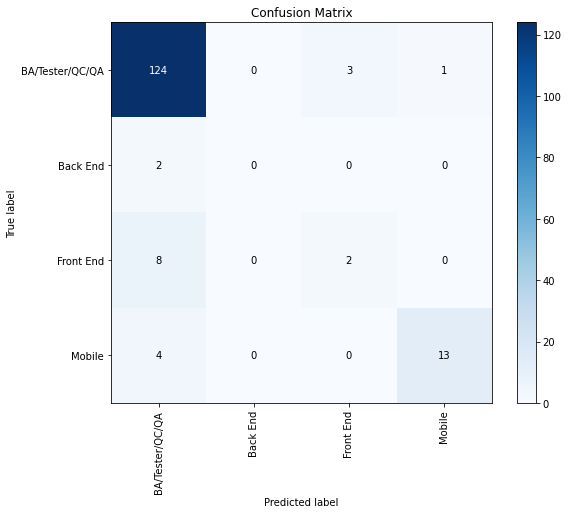

In [ ]:
import scikitplot as skplt
#plot confusion matrix
skplt.metrics.plot_confusion_matrix(
    Y_test,
    lgr_pred,
    x_tick_rotation =90,
    figsize=(9,7)
)

### 2.4 KNeighbors Classifier

Text(0, 0.5, 'Accuracy')

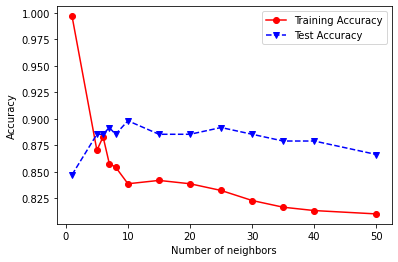

In [ ]:
%matplotlib inline

numNeighbors =[1,5,6,7,8,10,15,20,25,30,35,40,50]
trainAcc = []
testAcc =[]

for k in numNeighbors:
    clf1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf1.fit(X_train, Y_train)
    Y_predTrain = clf1.predict(X_train)
    Y_predTest = clf1.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc, 'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 8, metric ='minkowski', p=2)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(Y_test, knn_pred)

knn_precision = precision_score(Y_test, knn_pred, average='weighted')

knn_recall = recall_score(Y_test, knn_pred, average='weighted')

knn_f1_score = f1_score(Y_test, knn_pred, average='weighted')


print('Accuracy of KNN: '+ str(knn_acc))
print('F1-Score of KNN: '+ str(knn_f1_score))
print('Precision of KNN: '+ str(knn_precision))
print('Recall of KNN: '+ str(knn_recall))
print(classification_report(Y_test, knn_pred))

Accuracy of KNN: 0.8853503184713376
F1-Score of KNN: 0.8650268046848671
Precision of KNN: 0.863016938982738
Recall of KNN: 0.8853503184713376
                 precision    recall  f1-score   support

BA/Tester/QC/QA       0.90      0.97      0.93       128
       Back End       0.00      0.00      0.00         2
      Front End       0.67      0.20      0.31        10
         Mobile       0.81      0.76      0.79        17

       accuracy                           0.89       157
      macro avg       0.59      0.48      0.51       157
   weighted avg       0.86      0.89      0.87       157



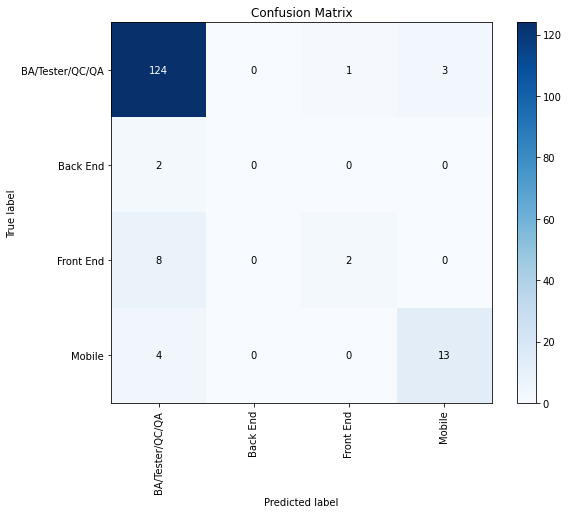

In [ ]:
skplt.metrics.plot_confusion_matrix(
    Y_test,
    knn_pred,
    x_tick_rotation =90,
    figsize=(9,7)
)

### 2.5 Decision Tree

Text(0, 0.5, 'Accuracy')

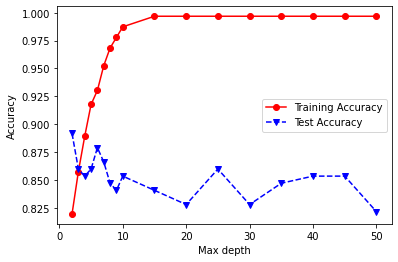

In [ ]:
maxdepths =[2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50] #17 different depths

trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf2 = DecisionTreeClassifier(max_depth=depth)
    clf2 = clf2.fit(X_train, Y_train)
    Y_predTrain = clf2.predict(X_train)
    Y_predTest = clf2.predict(X_test)
    trainAccuracy[index] = accuracy_score(Y_train, Y_predTrain)
    testAccuracy[index] = accuracy_score(Y_test, Y_predTest)
    index +=1
### plot training and test

plt.plot(maxdepths, trainAccuracy, 'ro-', maxdepths, testAccuracy,"bv--")
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel("Max depth")
plt.ylabel('Accuracy')

In [ ]:
dt = DecisionTreeClassifier(max_depth=3)
dt2 = dt.fit(X_train, Y_train)
dt_pred = dt2.predict(X_test)

dt_acc = accuracy_score(Y_test, dt_pred)

dt_precision = precision_score(Y_test, dt_pred, average='weighted')

dt_recall = recall_score(Y_test, dt_pred, average='weighted')

dt_f1_score = f1_score(Y_test, dt_pred, average='weighted')


print("Accuracy of Decision Tree: "+ str(dt_acc))
print('F1-Score of Decision Tree:: '+ str(dt_f1_score))
print('Precision of Decision Tree: '+ str(dt_precision))
print('Recall of Decision Tree: '+ str(dt_recall))


print(classification_report(Y_test, dt_pred))

Accuracy of Decision Tree: 0.8535031847133758
F1-Score of Decision Tree:: 0.8488556788322936
Precision of Decision Tree: 0.8547662053698749
Recall of Decision Tree: 0.8535031847133758
                 precision    recall  f1-score   support

BA/Tester/QC/QA       0.90      0.94      0.92       128
       Back End       0.00      0.00      0.00         2
      Front End       0.50      0.20      0.29        10
         Mobile       0.86      0.71      0.77        17

       accuracy                           0.85       157
      macro avg       0.56      0.46      0.49       157
   weighted avg       0.85      0.85      0.85       157



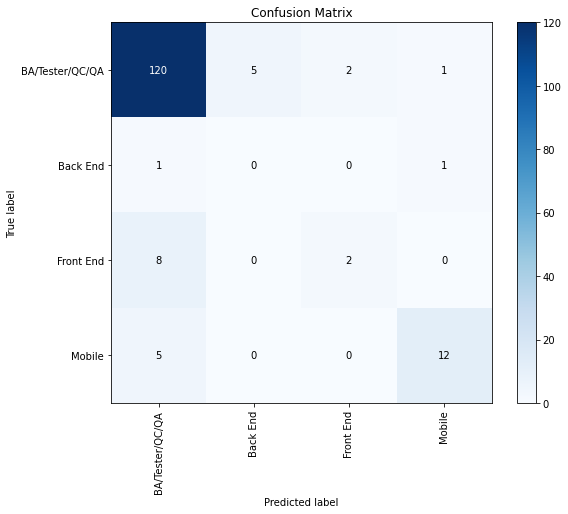

In [ ]:
skplt.metrics.plot_confusion_matrix(
    Y_test,
    dt_pred,
    x_tick_rotation = 90,
    figsize =(9,7)
)

### 2.6 Support Vector Machines

Text(0, 0.5, 'Accuracy')

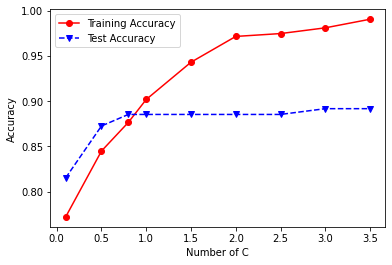

In [ ]:
Csvm=[0.1,0.5,0.8,1,1.5,2,2.5,3,3.5]
from sklearn import svm
trainAcc = []
testAcc = []

for c in Csvm:
  modelsvm= svm.SVC(C=c, gamma =1, kernel ='rbf')
  svmfit= modelsvm.fit(X_train, Y_train)
  Y_predTrain = modelsvm.predict(X_train)
  y_predTest = modelsvm.predict(X_test)
  trainAcc.append(accuracy_score(Y_train, Y_predTrain))
  testAcc.append(accuracy_score(Y_test, y_predTest))

plt.plot (Csvm, trainAcc, 'ro-', Csvm, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel("Number of C")
plt.ylabel("Accuracy")

In [ ]:
from sklearn.svm import SVC
from sklearn import svm
svm = svm.SVC(C= 0.5, gamma = 1, kernel ='rbf', probability =True)
svmfit =svm.fit(X_train, Y_train)
svm_predictions= svmfit.predict(X_test)

svm_acc= accuracy_score(Y_test, svm_predictions)

svm_precision = precision_score(Y_test, svm_predictions, average='weighted')

svm_recall = recall_score(Y_test, svm_predictions, average='weighted')

svm_f1_score = f1_score(Y_test, svm_predictions, average='weighted')


print("Accuracy of SVM: "+ str(svm_acc))
print('F1-Score of SVM '+ str(svm_f1_score))
print('Precision of SVM: '+ str(svm_precision))
print('Recall of SVM: '+ str(svm_recall))


print (classification_report(Y_test, svm_predictions))

Accuracy of SVM: 0.8726114649681529
F1-Score of SVM 0.8311711366266891
Precision of SVM: 0.8133930108452402
Recall of SVM: 0.8726114649681529
                 precision    recall  f1-score   support

BA/Tester/QC/QA       0.86      1.00      0.93       128
       Back End       0.00      0.00      0.00         2
      Front End       0.00      0.00      0.00        10
         Mobile       1.00      0.53      0.69        17

       accuracy                           0.87       157
      macro avg       0.47      0.38      0.40       157
   weighted avg       0.81      0.87      0.83       157



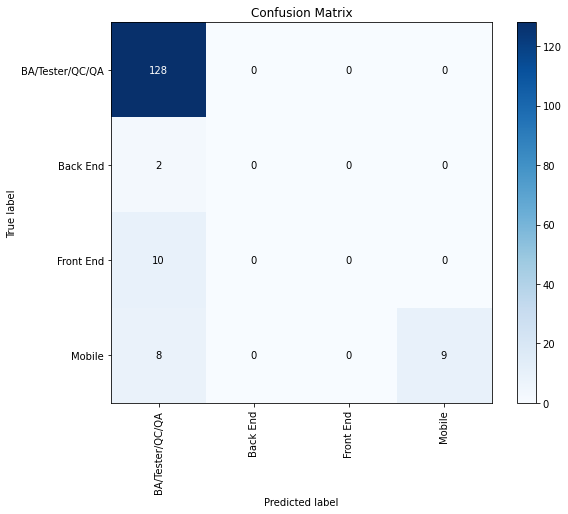

In [ ]:
skplt.metrics.plot_confusion_matrix(
    Y_test,
    svm_predictions,
    x_tick_rotation =90,
    figsize =(9,7)
)

### 2.7 Random Forest

Text(0, 0.5, 'Accuracy')

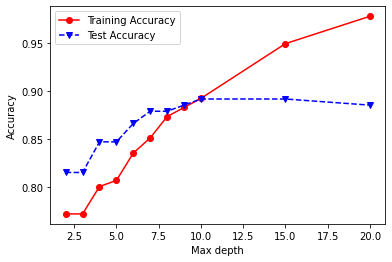

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
maxdepths =[2,3,4,5,6,7,8,9,10,15,20]

trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    rf = RandomForestClassifier(max_depth=depth)
    rf = rf.fit(X_train, Y_train)
    Y_predTrain = rf.predict(X_train)
    Y_predTest = rf.predict(X_test)
    trainAccuracy[index] = accuracy_score(Y_train, Y_predTrain)
    testAccuracy[index] = accuracy_score(Y_test, Y_predTest)
    index +=1
### plot training and test

plt.plot(maxdepths, trainAccuracy, 'ro-', maxdepths, testAccuracy,"bv--")
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel("Max depth")
plt.ylabel('Accuracy')

In [ ]:
random = RandomForestClassifier(max_depth=9)
random2 = random.fit(X_train, Y_train)
random_pred = random2.predict(X_test)

random_acc = accuracy_score(Y_test, random_pred)

random_precision = precision_score(Y_test, random_pred, average='weighted')

random_recall = recall_score(Y_test, random_pred, average='weighted')

random_f1_score = f1_score(Y_test, random_pred, average='weighted')


print("Accuracy of Random Forest: "+ str(random_acc))
print('F1-Score of Random Forest '+ str(random_f1_score))
print('Precision of Random Forest: '+ str(random_precision))
print('Recall of Random Forest: '+ str(random_recall))



print(classification_report(Y_test, random_pred))

Accuracy of Random Forest: 0.89171974522293
F1-Score of Random Forest 0.8723910486572579
Precision of Random Forest: 0.8655645092661084
Recall of Random Forest: 0.89171974522293
                 precision    recall  f1-score   support

BA/Tester/QC/QA       0.90      0.98      0.94       128
       Back End       0.00      0.00      0.00         2
      Front End       0.50      0.20      0.29        10
         Mobile       0.93      0.76      0.84        17

       accuracy                           0.89       157
      macro avg       0.58      0.49      0.52       157
   weighted avg       0.87      0.89      0.87       157



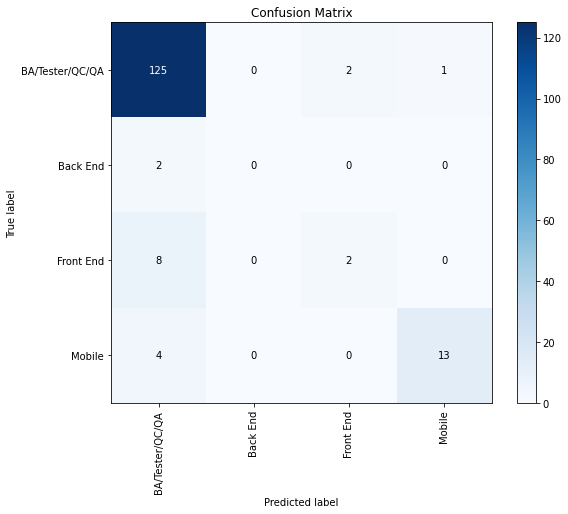

In [ ]:
skplt.metrics.plot_confusion_matrix(
    Y_test,
    random_pred,
    x_tick_rotation =90,
    figsize =(9,7)
)

### 2.8 KNN + Decision Tree

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('knn',knn),
    ('dt',dt) ]

# Build stack model
knn_dt_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
knn_dt_model.fit(X_train, Y_train)

# Make predictions

knn_dt_model_pred = knn_dt_model.predict(X_test)

# Calculation
knn_dt_model_acc = accuracy_score(Y_test, knn_dt_model_pred)

knn_dt_model_precision = precision_score(Y_test, knn_dt_model_pred, average='weighted')

knn_dt_model_recall = recall_score(Y_test, knn_dt_model_pred, average='weighted')

knn_dt_model_f1_score = f1_score(Y_test, knn_dt_model_pred, average='weighted')

print("Accuracy of KNN and DT: "+ str(knn_dt_model_acc))
print("Precision of KNN and DT: "+ str(knn_dt_model_precision))
print("Recall of KNN and DT: "+ str(knn_dt_model_recall))
print("F1-Score of KNN and DT: "+ str(knn_dt_model_f1_score))



Accuracy of KNN and DT: 0.89171974522293
Precision of KNN and DT: 0.8655560999510045
Recall of KNN and DT: 0.89171974522293
F1-Score of KNN and DT: 0.8714353618622086


### 2.9 KNN + SVM

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list2 = [
    ('knn',knn),
    ('svm',svm) ]

# Build stack model
knn_svm_model = StackingClassifier(
    estimators=estimator_list2, final_estimator=LogisticRegression()
)

# Train stacked model
knn_svm_model.fit(X_train, Y_train)

# Make predictions

knn_svm_model_pred = knn_svm_model.predict(X_test)

# Calculation
knn_svm_model_acc = accuracy_score(Y_test, knn_svm_model_pred)

knn_svm_model_precision = precision_score(Y_test, knn_svm_model_pred, average='weighted')

knn_svm_model_recall = recall_score(Y_test, knn_svm_model_pred, average='weighted')

knn_svm_model_f1_score = f1_score(Y_test, knn_svm_model_pred, average='weighted')

print("Accuracy of KNN and SVM: "+ str(knn_svm_model_acc))
print("Precision of KNN and SVM: "+ str(knn_svm_model_precision))
print("Recall of KNN and SVM: "+ str(knn_svm_model_recall))
print("F1-Score of KNN and SVM: "+ str(knn_svm_model_f1_score))



Accuracy of KNN and SVM: 0.8980891719745223
Precision of KNN and SVM: 0.8738853503184713
Recall of KNN and SVM: 0.8980891719745223
F1-Score of KNN and SVM: 0.8786540455140132


### 2.10 KNN + Random

In [ ]:

estimator_list3 = [
    ('knn',knn),
    ('random',random) ]

# Build stack model
knn_random_model = StackingClassifier(
    estimators=estimator_list3, final_estimator=LogisticRegression()
)

# Train stacked model
knn_random_model.fit(X_train, Y_train)

# Make predictions

knn_random_model_pred = knn_random_model.predict(X_test)

# Calculation
knn_random_model_acc = accuracy_score(Y_test, knn_random_model_pred)

knn_random_model_precision = precision_score(Y_test, knn_random_model_pred, average='weighted')

knn_random_model_recall = recall_score(Y_test, knn_random_model_pred, average='weighted')

knn_random_model_f1_score = f1_score(Y_test, knn_random_model_pred, average='weighted')

print("Accuracy of KNN and Random: "+ str(knn_random_model_acc))
print("Precision of KNN and Random: "+ str(knn_random_model_precision))
print("Recall of KNN and Random: "+ str(knn_random_model_recall))
print("F1-Score of KNN and Random: "+ str(knn_random_model_f1_score))



Accuracy of KNN and Random: 0.89171974522293
Precision of KNN and Random: 0.8709678540278892
Recall of KNN and Random: 0.89171974522293
F1-Score of KNN and Random: 0.8699853741787774


### 2.11 Decision Tree + SVM

In [ ]:

estimator_list4 = [
    ('dt',dt),
    ('svm',svm) ]

# Build stack model
dt_svm_model = StackingClassifier(
    estimators=estimator_list4, final_estimator=LogisticRegression()
)

# Train stacked model
dt_svm_model.fit(X_train, Y_train)

# Make predictions

dt_svm_model_pred = dt_svm_model.predict(X_test)

# Calculation
dt_svm_model_acc = accuracy_score(Y_test, dt_svm_model_pred)

dt_svm_model_precision = precision_score(Y_test, dt_svm_model_pred, average='weighted')

dt_svm_model_recall = recall_score(Y_test, dt_svm_model_pred, average='weighted')

dt_svm_model_f1_score = f1_score(Y_test, dt_svm_model_pred, average='weighted')

print("Accuracy of DT and SVM: "+ str(dt_svm_model_acc))
print("Precision of DT and SVM: "+ str(dt_svm_model_precision))
print("Recall of DT and SVM: "+ str(dt_svm_model_recall))
print("F1-Score of DT and SVM: "+ str(dt_svm_model_f1_score))



Accuracy of DT and SVM: 0.8980891719745223
Precision of DT and SVM: 0.8704670138081734
Recall of DT and SVM: 0.8980891719745223
F1-Score of DT and SVM: 0.8792108424364165


### 2.12 Random + SVM

In [ ]:

estimator_list5 = [
    ('random',random),
    ('svm',svm) ]

# Build stack model
random_svm_model = StackingClassifier(
    estimators=estimator_list5, final_estimator=LogisticRegression()
)

# Train stacked model
random_svm_model.fit(X_train, Y_train)

# Make predictions

random_svm_model_pred = random_svm_model.predict(X_test)

# Calculation
random_svm_model_acc = accuracy_score(Y_test, random_svm_model_pred)

random_svm_model_precision = precision_score(Y_test, random_svm_model_pred, average='weighted')

random_svm_model_recall = recall_score(Y_test, random_svm_model_pred, average='weighted')

random_svm_model_f1_score = f1_score(Y_test, random_svm_model_pred, average='weighted')

print("Accuracy of SVM and Random: "+ str(random_svm_model_acc))
print("Precision of SVM and Random: "+ str(random_svm_model_precision))
print("Recall of SVM and Random: "+ str(random_svm_model_recall))
print("F1-Score of SVM and Random: "+ str(random_svm_model_f1_score))



Accuracy of SVM and Random: 0.89171974522293
Precision of SVM and Random: 0.8655645092661084
Recall of SVM and Random: 0.89171974522293
F1-Score of SVM and Random: 0.8723910486572579


### 2.13 KNN + DT + SVM

In [ ]:

estimator_list6 = [
    ('knn',knn),
    ('dt',dt),('svm',svm) ]

# Build stack model
knn_dt_svm_model = StackingClassifier(
    estimators=estimator_list6, final_estimator=LogisticRegression()
)

# Train stacked model
knn_dt_svm_model.fit(X_train, Y_train)

# Make predictions

knn_dt_svm_model_pred =knn_dt_svm_model.predict(X_test)

# Calculation
knn_dt_svm_model_acc = accuracy_score(Y_test, knn_dt_svm_model_pred)

knn_dt_svm_model_precision = precision_score(Y_test, knn_dt_svm_model_pred, average='weighted')

knn_dt_svm_model_recall = recall_score(Y_test, knn_dt_svm_model_pred, average='weighted')

knn_dt_svm_model_f1_score = f1_score(Y_test, knn_dt_svm_model_pred, average='weighted')

print("Accuracy of KNN and DT and SVM: "+ str(knn_dt_svm_model_acc))
print("Precision of KNN and DT and SVM: "+ str(knn_dt_svm_model_precision))
print("Recall of KNN and DT and SVM: "+ str(knn_dt_svm_model_recall))
print("F1-Score of KNN and DT and SVM: "+ str(knn_dt_svm_model_f1_score))



Accuracy of KNN and DT and SVM: 0.8980891719745223
Precision of KNN and DT and SVM: 0.8704670138081734
Recall of KNN and DT and SVM: 0.8980891719745223
F1-Score of KNN and DT and SVM: 0.8792108424364165


### 2.14 KNN + Random + SVM

In [ ]:

estimator_list7 = [
    ('knn',knn),
    ('random',random),('svm',svm) ]

# Build stack model
knn_random_svm_model = StackingClassifier(
    estimators=estimator_list7, final_estimator=LogisticRegression()
)

# Train stacked model
knn_random_svm_model.fit(X_train, Y_train)

# Make predictions

knn_random_svm_model_pred =knn_random_svm_model.predict(X_test)

# Calculation
knn_random_svm_model_acc = accuracy_score(Y_test, knn_random_svm_model_pred)

knn_random_svm_model_precision = precision_score(Y_test, knn_random_svm_model_pred, average='weighted')

knn_random_svm_model_recall = recall_score(Y_test, knn_random_svm_model_pred, average='weighted')

knn_random_svm_model_f1_score = f1_score(Y_test, knn_random_svm_model_pred, average='weighted')

print("Accuracy of KNN and DT and SVM: "+ str(knn_random_svm_model_acc))
print("Precision of KNN and DT and SVM: "+ str(knn_random_svm_model_precision))
print("Recall of KNN and DT and SVM: "+ str(knn_random_svm_model_recall))
print("F1-Score of KNN and DT and SVM: "+ str(knn_random_svm_model_f1_score))



Accuracy of KNN and DT and SVM: 0.89171974522293
Precision of KNN and DT and SVM: 0.8655645092661084
Recall of KNN and DT and SVM: 0.89171974522293
F1-Score of KNN and DT and SVM: 0.8723910486572579


### Bagging – RandomForestClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=RandomForestClassifier(), n_estimators =100,
    random_state=10)

bag_model.fit(X_train, Y_train)
bagging_predict = bag_model.predict(X_test)

# Calculation
bagging_model_acc = accuracy_score(Y_test, bagging_predict)

bagging_model_precision = precision_score(Y_test, bagging_predict, average='weighted')

bagging_model_recall = recall_score(Y_test, bagging_predict, average='weighted')

bagging_model_f1_score = f1_score(Y_test, bagging_predict, average='weighted')

print("Accuracy of Bagging: "+ str(bagging_model_acc))
print("Precision of Bagging: "+ str(bagging_model_precision))
print("Recall of Bagging: "+ str(bagging_model_recall))
print("F1-Score of Bagging: "+ str(bagging_model_f1_score))

Accuracy of Bagging: 0.89171974522293
Precision of Bagging: 0.8641742822856089
Recall of Bagging: 0.89171974522293
F1-Score of Bagging: 0.8724228964130071


### Boosting – Gradient Boosting (GBM)

In [ ]:
from sklearn import datasets, ensemble

param = {
    "n_estimators":100,
    "max_depth" : 6,
    "min_samples_split": 4,
    "learning_rate": 0.1,
    "subsample": 1
}

gbr_model = ensemble.GradientBoostingClassifier(**param, random_state=6)
gbr_model.fit(X_train, Y_train)
gbr_predict = gbr_model.predict(X_test)

# Calculation
gbr_model_acc = accuracy_score(Y_test, gbr_predict)

gbr_model_precision = precision_score(Y_test, gbr_predict, average='weighted')

gbr_model_recall = recall_score(Y_test, gbr_predict, average='weighted')

gbr_model_f1_score = f1_score(Y_test, gbr_predict, average='weighted')

print("Accuracy of GBM: "+ str(gbr_model_acc))
print("Precision of GBM: "+ str(gbr_model_precision))
print("Recall of GBM: "+ str(gbr_model_recall))
print("F1-Score of GBM: "+ str(gbr_model_f1_score))

Accuracy of GBM: 0.8598726114649682
Precision of GBM: 0.8636336063087655
Recall of GBM: 0.8598726114649682
F1-Score of GBM: 0.8608014861995753


###  Boosting – XGBoost

In [ ]:
pip install xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

params = {
    'evel_metric': 'error ',
    'max_depth': 11,
    'min_child_weeight': 1,
    'subsample': 0.9,
    'colsample_bytree': 0.7,
}

xgbr_model = xgb.XGBClassifier(**params, random_state=10)
xgbr_model.fit(X_train, Y_train)
xgbr_predict = xgbr_model.predict(X_test)

# Calculation
xgbr_model_acc = accuracy_score(Y_test, xgbr_predict)

xgbr_model_precision = precision_score(Y_test, xgbr_predict, average='weighted')

xgbr_model_recall = recall_score(Y_test, xgbr_predict, average='weighted')

xgbr_model_f1_score = f1_score(Y_test, xgbr_predict, average='weighted')

print("Accuracy of XGBM: "+ str(xgbr_model_acc))
print("Precision of XGBM: "+ str(xgbr_model_precision))
print("Recall of XGBM: "+ str(xgbr_model_recall))
print("F1-Score of XGBM: "+ str(xgbr_model_f1_score))



Accuracy of XGBM: 0.89171974522293
Precision of XGBM: 0.8745415942868173
Recall of XGBM: 0.89171974522293
F1-Score of XGBM: 0.882595677500136


## III. Evaluation of Algorithms

*Evaluation the 5 different algorithms and determine the best classification alogithm*

### 3.1 Accuracy

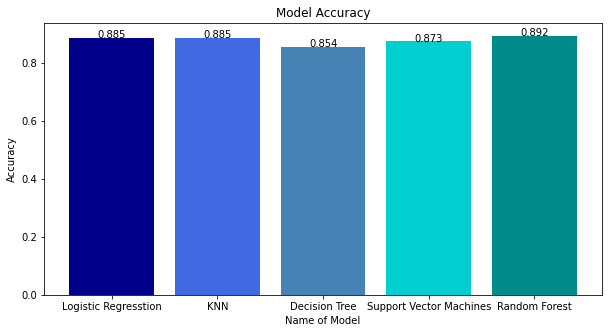

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i], y[i], ha ='center')

#initializing the labels and model accuracy. The model accuracy round up 2dp
label = ("Logistic Regresstion","KNN","Decision Tree", "Support Vector Machines", "Random Forest")
modelAccuracy =[round(lgr_acc, 3), round(knn_acc, 3), round(dt_acc,3), round(svm_acc,3), round(random_acc,3)]

#setting the figure size
plt.figure(figsize = (10,5))

#making the bar chart on the data
plt.bar(label, modelAccuracy, color =['darkblue', 'royalblue', 'steelblue','darkturquoise','darkcyan'])

#calling the function to add value labels
addlabels(label, modelAccuracy)

#giving title to the plot
plt.title("Model Accuracy")

#giving X and Y labesl
plt.xlabel("Name of Model")
plt.ylabel("Accuracy")

plt.show()

### 3.2 Table Result

In [ ]:
acc_train_list = {
'LRG':lgr_acc,
'KNN':knn_acc,
'DT': dt_acc,
'SVM': svm_acc,
'RANDOM': random_acc,
'KNN + DT + LRG': knn_dt_model_acc,
'KNN + SVM + LRG': knn_svm_model_acc,
'KNN + RANDOM + LRG': knn_random_model_acc,
'SVM + DT + LRG': dt_svm_model_acc ,
'RANDOM + DT + LRG': random_svm_model_acc,
'KNN + DT +  SVM + LRG': knn_dt_svm_model_acc,
'KNN + RANDOM +  SVM + LRG': knn_random_svm_model_acc,
'Bagging – RandomForest' : bagging_model_acc,
'Gradient Boosting (GBM)' : gbr_model_acc,
'XGBoost' : xgbr_model_acc
}

precision_train_list = {
    'LRG':lgr_precision,
    'KNN':knn_precision,
'DT': dt_precision,
'SVM': svm_precision,
'RANDOM': random_precision,
'KNN + DT + LRG': knn_dt_model_precision,
'KNN + SVM + LRG': knn_svm_model_precision,
'KNN + RANDOM + LRG': knn_random_model_precision,
'SVM + DT + LRG': dt_svm_model_precision ,
'RANDOM + DT + LRG': random_svm_model_precision,
'KNN + DT +  SVM + LRG': knn_dt_svm_model_precision,
'KNN + RANDOM +  SVM + LRG': knn_random_svm_model_precision,
'Bagging – RandomForest' : bagging_model_precision,
'Gradient Boosting (GBM)' : gbr_model_precision,
'XGBoost' : xgbr_model_precision}

recall_train_list = {
        'LRG':lgr_recall,
    'KNN':knn_recall,
'DT': dt_recall,
'SVM': svm_recall,
'RANDOM': random_recall,
'KNN + DT + LRG': knn_dt_model_recall,
'KNN + SVM + LRG': knn_svm_model_recall,
'KNN + RANDOM + LRG': knn_random_model_recall,
'SVM + DT + LRG': dt_svm_model_recall ,
'RANDOM + DT + LRG': random_svm_model_recall,
'KNN + DT +  SVM + LRG': knn_dt_svm_model_recall,
'KNN + RANDOM +  SVM + LRG': knn_random_svm_model_recall,
'Bagging – RandomForest' : bagging_model_recall,
'Gradient Boosting (GBM)' : gbr_model_recall,
'XGBoost' : xgbr_model_recall}

F1_Score_train_list = {
'LRG':lgr_f1_score,
'KNN':knn_f1_score,
'DT': dt_f1_score,
'SVM': svm_f1_score,
'RANDOM': random_f1_score,
'KNN + DT + LRG': knn_dt_model_f1_score,
'KNN + SVM + LRG': knn_svm_model_f1_score,
'KNN + RANDOM + LRG': knn_random_model_f1_score,
'SVM + DT + LRG': dt_svm_model_f1_score ,
'RANDOM + DT + LRG': random_svm_model_f1_score,
'KNN + DT +  SVM + LRG': knn_dt_svm_model_f1_score,
'KNN + RANDOM +  SVM + LRG': knn_random_svm_model_f1_score,
'Bagging – RandomForest' : bagging_model_f1_score,
'Gradient Boosting (GBM)' : gbr_model_f1_score,
'XGBoost' : xgbr_model_f1_score}

In [ ]:
import pandas as pd

acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy'])
precision_df = pd.DataFrame.from_dict(precision_train_list, orient='index', columns=['Precision'])
recall_df = pd.DataFrame.from_dict(recall_train_list, orient='index', columns=['Recall'])
F1_Score_df = pd.DataFrame.from_dict(F1_Score_train_list, orient='index', columns=['F1-Score'])

df_eva = pd.concat([acc_df, precision_df, recall_df, F1_Score_df], axis=1)
df_eva

,Accuracy,Precision,Recall,F1-Score
LRG,0.885350,0.858600,0.885350,0.867918
KNN,0.885350,0.863017,0.885350,0.865027
DT,0.853503,0.854766,0.853503,0.848856
SVM,0.872611,0.813393,0.872611,0.831171
RANDOM,0.891720,0.865565,0.891720,0.872391
KNN + DT + LRG,0.891720,0.865556,0.891720,0.871435
KNN + SVM + LRG,0.898089,0.873885,0.898089,0.878654
KNN + RANDOM + LRG,0.891720,0.870968,0.891720,0.869985
SVM + DT + LRG,0.898089,0.870467,0.898089,0.879211
RANDOM + DT + LRG,0.891720,0.865565,0.891720,0.872391


## IV. Simple Web App

### 3.1 Finding out what are the skills needed for each role

### 3.1.1 Mobile

In [ ]:
labelData = df_job[df_job['Label'] =="Mobile"]
skillClass = []

for index, row in labelData.iterrows():
    skill = [row['Skills']]
    skillstokens_without_sw=[f for f in skill if not f.lower() in stopwordSkills]
    for j in skillstokens_without_sw:
        skillClass.append(j)
#put the cleaned skills into a new dataframe
df_Mobile = pd.DataFrame({'Skills': skillClass})

qtySkills = df_Mobile["Skills"].value_counts().tolist()
labelSkills = df_Mobile["Skills"].value_counts().index.tolist()

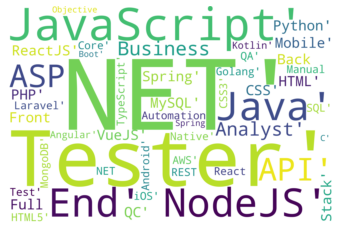

<Figure size 216000x216000 with 0 Axes>

In [ ]:
lskills = labelSkills
frequencies = qtySkills

d = dict(zip(lskill, frequencies))
wordcloud = w.WordCloud(collocations=False, random_state =1 ,
                        background_color='white', width=3000,
                        height =2000).generate(str(d))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis("off")
plt.figure(figsize=(3000,3000))
plt.show()

### 3.1.2 BA/Tester/QC/QA

In [ ]:
labelData = df_job[df_job['Label'] =="BA/Tester/QC/QA"]
skillClass = []

for index, row in labelData.iterrows():
    skill = [row['Skills']]
    skillstokens_without_sw=[f for f in skill if not f.lower() in stopwordSkills]
    for j in skillstokens_without_sw:
        skillClass.append(j)
#put the cleaned skills into a new dataframe
df_BA = pd.DataFrame({'Skills': skillClass})

qtySkills = df_BA["Skills"].value_counts().tolist()
labelSkills = df_BA["Skills"].value_counts().index.tolist()

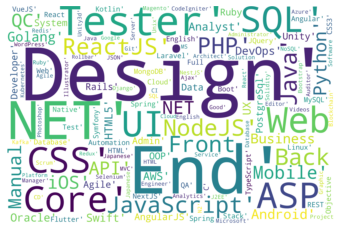

<Figure size 216000x216000 with 0 Axes>

In [ ]:
lskills = labelSkills
frequencies = qtySkills

d = dict(zip(lskill, frequencies))
wordcloud = w.WordCloud(collocations=False, random_state =1 ,
                        background_color='white', width=3000,
                        height =2000).generate(str(d))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis("off")
plt.figure(figsize=(3000,3000))
plt.show()

### 3.1.3 Back End

In [ ]:
labelData = df_job[df_job['Label'] =="Back End"]
skillClass = []

for index, row in labelData.iterrows():
    skill = [row['Skills']]
    skillstokens_without_sw=[f for f in skill if not f.lower() in stopwordSkills]
    for j in skillstokens_without_sw:
        skillClass.append(j)
#put the cleaned skills into a new dataframe
df_Back_End = pd.DataFrame({'Skills': skillClass})

qtySkills = df_Back_End["Skills"].value_counts().tolist()
labelSkills = df_Back_End["Skills"].value_counts().index.tolist()

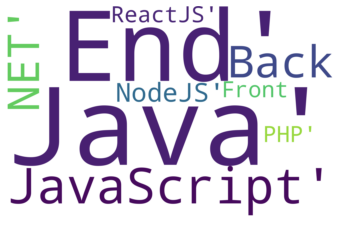

<Figure size 216000x216000 with 0 Axes>

In [ ]:
lskills = labelSkills
frequencies = qtySkills

d = dict(zip(lskill, frequencies))
wordcloud = w.WordCloud(collocations=False, random_state =42 ,
                        background_color='white', width=3000,
                        height =2000).generate(str(d))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis("off")
plt.figure(figsize=(3000,3000))
plt.show()

### 3.1.4 Front End

In [ ]:
labelData = df_job[df_job['Label'] =="Front End"]
skillClass = []

for index, row in labelData.iterrows():
    skill = [row['Skills']]
    skillstokens_without_sw=[f for f in skill if not f.lower() in stopwordSkills]
    for j in skillstokens_without_sw:
        skillClass.append(j)
#put the cleaned skills into a new dataframe
df_Font = pd.DataFrame({'Skills': skillClass})

qtySkills = df_Font["Skills"].value_counts().tolist()
labelSkills = df_Font["Skills"].value_counts().index.tolist()

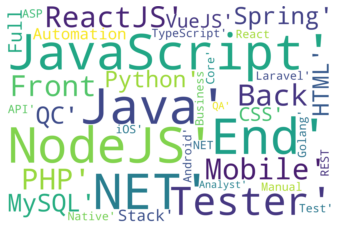

<Figure size 216000x216000 with 0 Axes>

In [ ]:
lskills = labelSkills
frequencies = qtySkills

d = dict(zip(lskill, frequencies))
wordcloud = w.WordCloud(collocations=False, random_state =42 ,
                        background_color='white', width=3000,
                        height =2000).generate(str(d))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis("off")
plt.figure(figsize=(3000,3000))
plt.show()

### 3.2 GET USER INPUT

In [ ]:
userInput = input("Enter your skills: ")
pred = vectorizer.transform([userInput.lower()])

outPut = random.predict(pred)

print(outPut[0])
print(pred)


Enter your skills: java
BA/Tester/QC/QA
  (0, 108)	1.0


### 3.3 Cosine Similarity

In [ ]:
cos = []
labelData = df_job[df_job["Label"] == outPut[0]]

for index, row in labelData.iterrows():
  skills = [row["Skills"]]
  skillVec = vectorizer.transform(skills)
  cos_lib = cosine_similarity(skillVec, pred)
  #print(cos_lib[0][0])
  cos.append(cos_lib[0][0])
labelData['cosine_similarity']= cos
#Display top 5
top_5 = labelData.sort_values('cosine_similarity', ascending =False)[['JobTitle', 'Company', 'Location','Salary', 'TypeofJob', 'Skills', "MoreInfo", "Label", "cosine_similarity"]]
top_5.head(5)

,JobTitle,Company,Location,Salary,TypeofJob,Skills,MoreInfo,Label,cosine_similarity
1188,Digital Banking Technical Officer - Chuyên viê...,Ngân hàng Đầu tư và Phát triển Campuchia (BIDC),None,"1,000 - 1,500 USD",Ngân Hàng,"Java, .NET",https://topdev.vn/viec-lam/digital-banking-tec...,BA/Tester/QC/QA,0.684660
82,IT PROGRAMMER (HCMC Office),NTT DATA Vietnam,"Quận 1, Hồ Chí Minh","Lên tới 17,000,000 VND","Dịch vụ doanh nghiệp, Dịch vụ IT","Java, .NET",https://topdev.vn/viec-lam/it-programmer-hcmc-...,BA/Tester/QC/QA,0.684660
266,Technical Trainer,Gameloft Vietnam,"Quận Bình Thạnh, Hồ Chí Minh",Thương lượng,Giải trí/ Game,"Java, Unity, C++",https://topdev.vn/viec-lam/technical-trainer-g...,BA/Tester/QC/QA,0.483526
1034,[Full-time/ Full-Remote] Web Developer (Python...,YRGLM Vietnam,"Quận 3, Hồ Chí Minh",Thương lượng,"Product, Software, Quảng Cáo Truyền Thông","Java, Python, ReactJS",https://topdev.vn/viec-lam/full-time-full-remo...,BA/Tester/QC/QA,0.479635
1037,IT - SOFTWARE ENGINEER (CORE BANKING),NGÂN HÀNG Á CHÂU (ACB),"Quận 3, Hồ Chí Minh",Thương lượng,Ngân Hàng,".NET, Java, C#, NodeJS, Golang",https://topdev.vn/viec-lam/it-software-enginee...,BA/Tester/QC/QA,0.417486


### 3.4 Euclidean Distance

In [ ]:
euclidean  =[]
labelData = df_job[df_job["Label"] == outPut[0]]

for index, row in labelData.iterrows():
  skills = [row["Skills"]]
  skillVec = vectorizer.transform(skills)
  euclidean_dist = euclidean_distances(skillVec, pred)
  #print(cos_lib[0][0])
  euclidean.append(euclidean_dist[0][0])
labelData['euclidean_distances']= euclidean
#Display top 5
top_5 = labelData.sort_values('euclidean_distances', ascending =False)[['JobTitle', 'Company', 'Location','Salary', 'TypeofJob', 'Skills', "MoreInfo", "Label", "euclidean_distances"]]
top_5.head(5)

,JobTitle,Company,Location,Salary,TypeofJob,Skills,MoreInfo,Label,euclidean_distances
0,IT PROJECT MANAGER,Yes4All Trading Services Company Limited,"Quận Phú Nhuận, Hồ Chí Minh",Thương lượng,Thương mại điện tử/ Bán lẻ,"Project Manager, Business Analyst",https://topdev.vn/viec-lam/it-project-manager-...,BA/Tester/QC/QA,1.414214
5260,Trưởng Ban Tối ưu & Thiết kế UI/UX (Chuyên môn...,NGÂN HÀNG THƯƠNG MẠI CỔ PHẦN BƯU ĐIỆN LIÊN VIỆT,"Quận Hoàn Kiếm, Hà Nội",Thương lượng,Ngân Hàng,"UX/UI Design, Business Analyst",https://topdev.vn/viec-lam/truong-ban-toi-uu-t...,BA/Tester/QC/QA,1.414214
5592,Chuyên viên cao cấp phát triển ứng dụng (Flutter),Công ty Cổ phần Chứng khoán KS (KS Securities ...,"Quận Nam Từ Liêm, Hà Nội",Thương lượng,Chứng khoán,"Android, iOS, Flutter",https://topdev.vn/viec-lam/chuyen-vien-cao-cap...,BA/Tester/QC/QA,1.414214
5591,iOS DEVELOPER (FRESHER - SENIOR),Minerva Technology Solutions JSC,"Quận 5, Hồ Chí Minh","9,000,000 - 30,000,000 VND","Outsourcing, Phần Mềm","iOS, OOP, Mobile, Swift, SwiftUI",https://topdev.vn/viec-lam/ios-developer-fresh...,BA/Tester/QC/QA,1.414214
5590,Front-end Developer (Angular),Blogic Systems,"Thành phố Thủ Đức, Hồ Chí Minh","1,300 - 2,000 USD",Phần Mềm,"HTML, Front-End, CSS3, Angular",https://topdev.vn/viec-lam/front-end-developer...,BA/Tester/QC/QA,1.414214


### 3.5 Manhattan Distances

In [ ]:
from sklearn.metrics.pairwise import manhattan_distances

manhattan  =[]
labelData = df_job[df_job["Label"] == outPut[0]]

for index, row in labelData.iterrows():
  skills = [row["Skills"]]
  skillVec = vectorizer.transform(skills)
  manhattan_dist = manhattan_distances(skillVec, pred)
  #print(cos_lib[0][0])
  manhattan.append(manhattan_dist[0][0])
labelData['manhattan_distances']= manhattan
#Display top 5
top_5 = labelData.sort_values('manhattan_distances', ascending =True)[['JobTitle', 'Company', 'Location','Salary', 'TypeofJob', 'Skills', "MoreInfo", "Label", "manhattan_distances"]]
top_5.head(5)

,JobTitle,Company,Location,Salary,TypeofJob,Skills,MoreInfo,Label,manhattan_distances
3236,Experienced C/C++ Developer,ISB Vietnam,"Quận Tân Bình, Hồ Chí Minh",Thương lượng,"Phần Mềm, Dịch vụ IT, Outsourcing",C/C++,https://topdev.vn/viec-lam/experienced-c-c-dev...,BA/Tester/QC/QA,1.000000
1188,Digital Banking Technical Officer - Chuyên viê...,Ngân hàng Đầu tư và Phát triển Campuchia (BIDC),None,"1,000 - 1,500 USD",Ngân Hàng,"Java, .NET",https://topdev.vn/viec-lam/digital-banking-tec...,BA/Tester/QC/QA,1.044202
82,IT PROGRAMMER (HCMC Office),NTT DATA Vietnam,"Quận 1, Hồ Chí Minh","Lên tới 17,000,000 VND","Dịch vụ doanh nghiệp, Dịch vụ IT","Java, .NET",https://topdev.vn/viec-lam/it-programmer-hcmc-...,BA/Tester/QC/QA,1.044202
266,Technical Trainer,Gameloft Vietnam,"Quận Bình Thạnh, Hồ Chí Minh",Thương lượng,Giải trí/ Game,"Java, Unity, C++",https://topdev.vn/viec-lam/technical-trainer-g...,BA/Tester/QC/QA,1.391803
1034,[Full-time/ Full-Remote] Web Developer (Python...,YRGLM Vietnam,"Quận 3, Hồ Chí Minh",Thương lượng,"Product, Software, Quảng Cáo Truyền Thông","Java, Python, ReactJS",https://topdev.vn/viec-lam/full-time-full-remo...,BA/Tester/QC/QA,1.760332


### 3.4 Final App Job Recommendation System

In [ ]:
userInput = input("Enter your skills: ")
predJob = vectorizer.transform([userInput.lower()])

topInput =  input("How many Jobs you want to know:  ")

output =random.predict(predJob)
print("You may look into " + output[0] + " job")
print("Here is a list of Jobs that is under "+ output[0])



manhattan  =[]
labelDataJob = df_job[df_job["Label"] == outPut[0]]

for index, row in labelDataJob.iterrows():
  skills = [row["Skills"]]
  skillVec = vectorizer.transform(skills)
  manhattan_dist = manhattan_distances(skillVec, pred)
  #print(cos_lib[0][0])
  manhattan.append(manhattan_dist[0][0])
labelDataJob['manhattan_distances']= manhattan

num_str = int(topInput)
#Display top Recommendation System
topJob = labelDataJob.sort_values('manhattan_distances', ascending =False)[['JobTitle', 'Company', 'Location','Salary', 'TypeofJob', 'Skills', "MoreInfo", "Label"]]
topJob.head(num_str)

Enter your skills: java
How many Jobs you want to know:  5
You may look into BA/Tester/QC/QA job
Here is a list of Jobs that is under BA/Tester/QC/QA


,JobTitle,Company,Location,Salary,TypeofJob,Skills,MoreInfo,Label
2745,"HOT 05 Front-end Developer (.NET, JS) - Up To ...",Báo điện tử Dân Trí,"Quận Đống Đa, Hà Nội","800 - 2,000 USD",Quảng Cáo Truyền Thông,"ASP.NET, C#, NodeJS, MS SQL, Redis, REST API, ...",https://topdev.vn/viec-lam/05-front-end-develo...,BA/Tester/QC/QA
9017,"Remote Full-stack Developer (ReactJS, NodeJS)~...",DATX Vietnam,"Quận Hai Bà Trưng, Hà Nội",Thương lượng,Fintech,"Front-End, Back-End, Database, JavaScript, MyS...",https://topdev.vn/viec-lam/remote-full-stack-d...,BA/Tester/QC/QA
84,Technical Leader/ Trưởng nhóm kỹ thuật ~ Signi...,NTT DATA Vietnam,"Quận Cầu Giấy, Hà Nội - Quận 1, Hồ Chí Minh","Lên tới 32,000,000 VND","Dịch vụ doanh nghiệp, Dịch vụ IT","Magento, Oracle, J2EE, MS SQL, NoSQL, React Na...",https://topdev.vn/viec-lam/technical-leader-tr...,BA/Tester/QC/QA
768,HOT [VieZ] Front-end Developer,DatVietVAC Group Holdings,"Quận 3, Hồ Chí Minh",Thương lượng,"Quảng Cáo Truyền Thông, Giải trí/ Game","HTML5, AngularJS, NodeJS, CSS3, React, C#, .NE...",https://topdev.vn/viec-lam/viez-front-end-deve...,BA/Tester/QC/QA
86,[Remote - Fulltime] Full-Stack Developer (PHP/...,NEOLAB VIỆT NAM (Đà Nẵng),"Quận Hải Châu, Đà Nẵng - None","Lên tới 2,000 USD",Phần Mềm,"PHP, Laravel, Symfony, Full-Stack, CodeIgniter...",https://topdev.vn/viec-lam/remote-fulltime-ful...,BA/Tester/QC/QA
